In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
accuracy_score, recall_score, precision_score, f1_score,
roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay,
RocCurveDisplay, roc_curve
)
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

In [2]:
credito = pd.read_csv('Credit.csv')

In [3]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [4]:
for col in credito.columns:
  if credito[col].dtype == 'object':
    credito[col] = credito[col].astype('category').cat.codes
  previsores = credito.iloc[:,0:20].values
  classe = credito.iloc[:,20].values
  X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,classe,
  test_size=0.3,random_state=123)

Modelo: RandomForestClassifier()
Parâmetros: {'clf__n_estimators': [50, 100, 500]}


c:\Repositories\data-science-studies\postgraduate\2025-01-Machine-Learning\venv\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
c:\Repositories\data-science-studies\postgraduate\2025-01-Machine-Learning\venv\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
2025/03/26 18:41:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo treinado:  bd71f3c2f1e940f98948aded81325987
Modelo: LogisticRegression(max_iter=500)
Parâmetros: {'clf__C': [0.1, 1, 10], 'clf__penalty': ['l2']}


c:\Repositories\data-science-studies\postgraduate\2025-01-Machine-Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Repositories\data-science-studies\postgraduate\2025-01-Machine-Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

Modelo treinado:  dbcd9eed51cc4b4d9a3a227a3ccffa4d
Modelo: KNeighborsClassifier()
Parâmetros: {'clf__n_neighbors': [3, 5, 7], 'clf__weights': ['uniform', 'distance']}


c:\Repositories\data-science-studies\postgraduate\2025-01-Machine-Learning\venv\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
c:\Repositories\data-science-studies\postgraduate\2025-01-Machine-Learning\venv\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
2025/03/26 18:41:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo treinado:  8c759b52b6384e168603a64c50580cb6


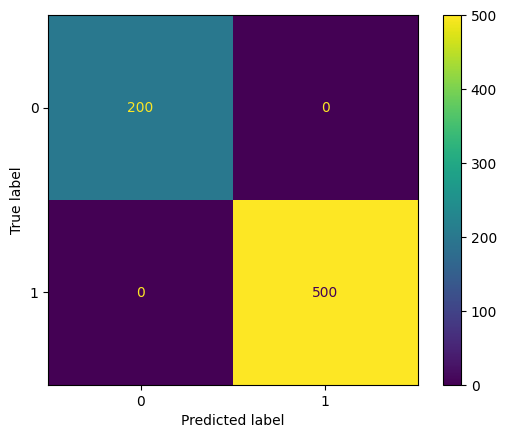

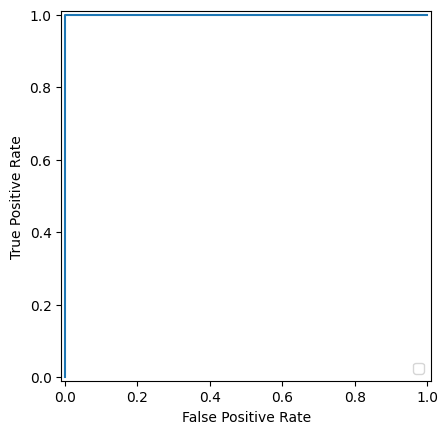

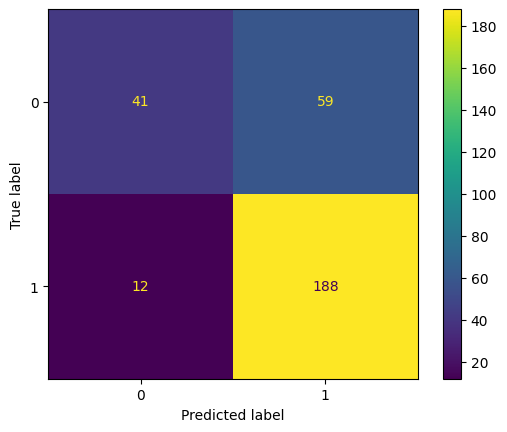

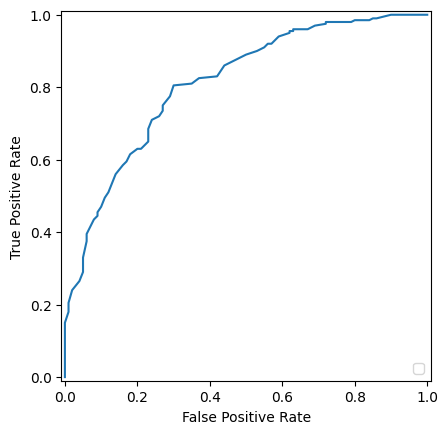

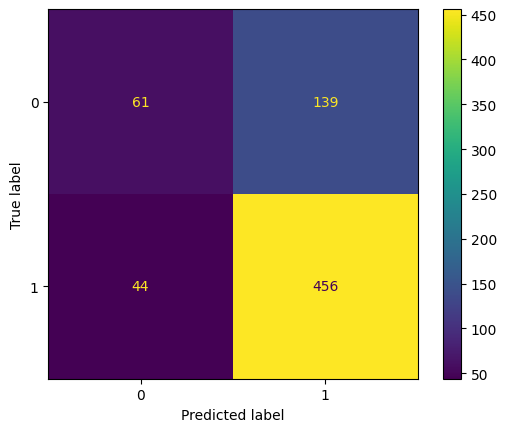

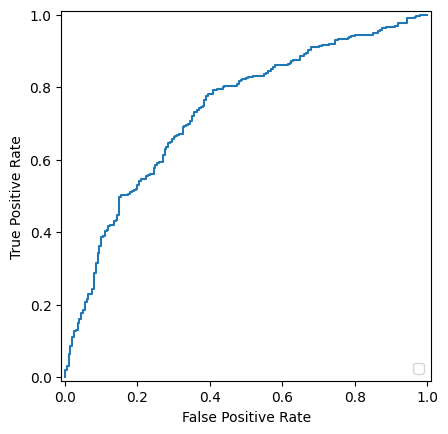

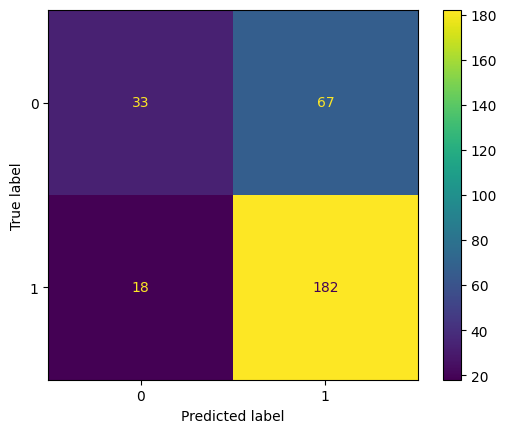

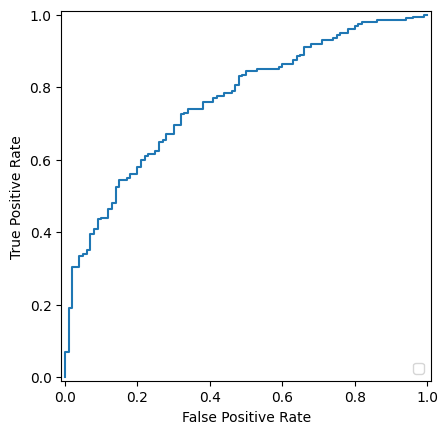

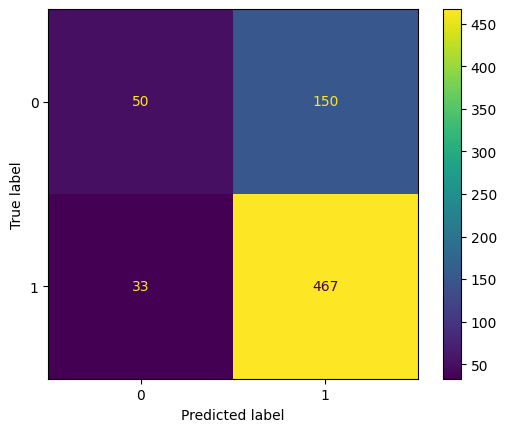

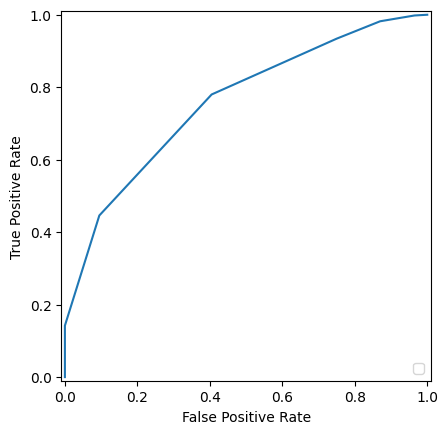

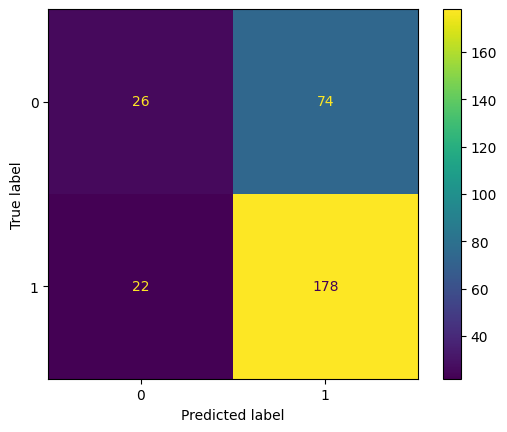

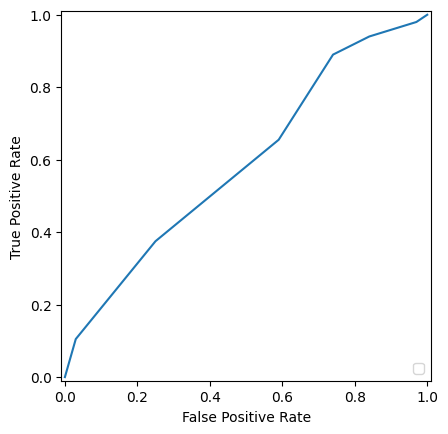

In [ ]:
def treina_modelo(modelo, parametros):
    mlflow.set_experiment("Atividade_Modular")
    pipeline = Pipeline([
        ('clf', modelo)
    ])
    grid = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring='accuracy')

    with mlflow.start_run():
        grid.fit(X_treinamento, y_treinamento)
        best_model = grid.best_estimator_
        previsoes_train = best_model.predict(X_treinamento)
        previsoes_teste = best_model.predict(X_teste)

        # Registro de hiperparâmetros e parâmetros selecionados
        mlflow.log_params(grid.best_params_)

        # Métricas - Treino
        acuracia_train = accuracy_score(y_treinamento, previsoes_train)
        recall_train = recall_score(y_treinamento, previsoes_train)
        precision_train = precision_score(y_treinamento, previsoes_train)
        f1_train = f1_score(y_treinamento, previsoes_train)
        auc_train = roc_auc_score(y_treinamento, previsoes_train)
        log_train = log_loss(y_treinamento, previsoes_train)

        # Registrar métricas
        mlflow.log_metric("acuracia_train", acuracia_train)
        mlflow.log_metric("recall_train", recall_train)
        mlflow.log_metric("precision_train", precision_train)
        mlflow.log_metric("f1_train", f1_train)
        mlflow.log_metric("auc_train", auc_train)
        mlflow.log_metric("log_train", log_train)

        # Matriz de Confusão - Treino
        cm = confusion_matrix(y_treinamento, previsoes_train)
        confusion_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        confusion_disp.plot()
        plt.savefig("confusion_matrix_train.png")
        mlflow.log_artifact("confusion_matrix_train.png")

        # Curva ROC - Treino
        if hasattr(best_model, "predict_proba"):  # Somente se o modelo tiver o método predict_proba
            fpr, tpr, _ = roc_curve(y_treinamento, best_model.predict_proba(X_treinamento)[:, 1])
            roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
            roc_disp.plot()
            plt.savefig("roc_curve_train.png")
            mlflow.log_artifact("roc_curve_train.png")

        # Métricas - Teste
        acuracia_test = accuracy_score(y_teste, previsoes_teste)
        recall_test = recall_score(y_teste, previsoes_teste)
        precision_test = precision_score(y_teste, previsoes_teste)
        f1_test = f1_score(y_teste, previsoes_teste)
        auc_test = roc_auc_score(y_teste, previsoes_teste)
        log_test = log_loss(y_teste, previsoes_teste)

        # Registrar métricas
        mlflow.log_metric("acuracia_test", acuracia_test)
        mlflow.log_metric("recall_test", recall_test)
        mlflow.log_metric("precision_test", precision_test)
        mlflow.log_metric("f1_test", f1_test)
        mlflow.log_metric("auc_test", auc_test)
        mlflow.log_metric("log_test", log_test)

        # Matriz de Confusão - Teste
        cm = confusion_matrix(y_teste, previsoes_teste)
        confusion_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        confusion_disp.plot()
        plt.savefig("confusion_matrix_test.png")
        mlflow.log_artifact("confusion_matrix_test.png")

        # Curva ROC - Teste
        if hasattr(best_model, "predict_proba"):  # Somente se o modelo tiver o método predict_proba
            fpr, tpr, _ = roc_curve(y_teste, best_model.predict_proba(X_teste)[:, 1])
            roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
            roc_disp.plot()
            plt.savefig("roc_curve_test.png")
            mlflow.log_artifact("roc_curve_test.png")

        # Logar o modelo
        mlflow.sklearn.log_model(best_model, "Modelo")
        print("Modelo treinado: ", mlflow.active_run().info.run_uuid)

    mlflow.end_run()


In [ ]:
# Configuração de modelos e hiperparâmetros
modelos_e_parametros = {
    RandomForestClassifier(): {
        'clf__n_estimators': [50, 100, 500]
    },
    LogisticRegression(max_iter=500): {
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l2']
    },
    KNeighborsClassifier(): {
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights': ['uniform', 'distance']
    }
}

In [ ]:
# Loop para treinar e registrar cada modelo com diferentes parâmetros
for modelo, parametros in modelos_e_parametros.items():
    print("Modelo:", modelo)
    print("Parâmetros:", parametros)
    treina_modelo(modelo, parametros)